# CSE-676 Programming Assignment-1 [100pts]

## Task-1 [20pts]

### Modular Implementation of a Neural Network for Binary Classification
Implement a modular Two Layer Neural Network to classify datapoints from the given dataset.

#### Dataset Source:
https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_moons.html

#### References:
https://cs231n.github.io/optimization-2/


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [19]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step-1: Initialize Parameters such as Weights and Biases

In [20]:
def initialize_parameters(n_x, n_h, n_y):
    # ====================== YOUR CODE HERE ======================
    """
    Initialize the parameters for a two-layer neural network.

    Arguments:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- dictionary containing parameters:
                  W1 -- weight matrix of shape (n_h, n_x)
                  b1 -- bias vector of shape (n_h, 1)
                  W2 -- weight matrix of shape (n_y, n_h)
                  b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(42)  # For reproducible results

    # Initialize weights with small random values and biases with zeros
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters
    # ============================================================

#### Step-2: Define Sigmoid, ReLU & ReLU Functions

In [21]:
def sigmoid(Z):
    # ====================== YOUR CODE HERE ======================
    """
    Sigmoid activation function

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    """
    A = 1 / (1 + np.exp(-Z))
    return A
    # ============================================================

def relu(Z):
    # ====================== YOUR CODE HERE ======================
    """
    ReLU activation function

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of relu(z), same shape as Z
    """
    A = np.maximum(0, Z)
    return A
    # ============================================================
    
def relu_derivative(Z):
    # ====================== YOUR CODE HERE ======================
    """
    Derivative of the ReLU function

    Arguments:
    Z -- numpy array of any shape

    Returns:
    dA -- derivative of the ReLU function, same shape as Z
    """
    dA = np.where(Z > 0, 1, 0)
    return dA
    # ============================================================

#### Forward Propagation

In [22]:
def forward_propagation(X, params):
    # ====================== YOUR CODE HERE ======================
    """
    Implement forward propagation for the model: LINEAR -> RELU -> LINEAR -> SIGMOID

    Arguments:
    X -- input data of shape (n_x, m), where m is the number of examples
    params -- python dictionary containing parameters

    Returns:
    A2 -- final activations value
    cache -- dictionary containing "Z1", "A1", "Z2", "A2"
    """
    # Retrieve parameters from dictionary
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    # First layer - Linear -> ReLU
    Z1 = np.dot(W1, X.T) + b1  # Shape: (n_h, m)
    A1 = relu(Z1)              # Shape: (n_h, m)

    # Second layer - Linear -> Sigmoid
    Z2 = np.dot(W2, A1) + b2   # Shape: (n_y, m)
    A2 = sigmoid(Z2)           # Shape: (n_y, m)
    # ============================================================
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache
    

#### Step-3: Define Loss Function

In [23]:
def compute_loss(A2, Y):
    # ====================== YOUR CODE HERE ======================
    """
    Compute the binary cross-entropy loss

    Arguments:
    A2 -- probability vector of shape (1, m)
    Y -- true "label" vector of shape (1, m)

    Returns:
    loss -- binary cross-entropy loss
    """
    m = Y.shape[0]

    # Binary cross-entropy loss
    loss = -1/m * np.sum(Y * np.log(A2.T + 1e-8) + (1 - Y) * np.log(1 - A2.T + 1e-8))

    # ============================================================
    return np.squeeze(loss)


#### Step-4: Compute Gradients at each layer

In [24]:
def backward_propagation(X, Y, params, cache):
    # ====================== YOUR CODE HERE ======================
    """
    Implement backward propagation for the model

    Arguments:
    X -- input data of shape (n_x, m), where m is the number of examples
    Y -- true "label" vector of shape (1, m)
    params -- python dictionary containing parameters
    cache -- dictionary containing "Z1", "A1", "Z2", "A2"

    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[0]

    # Retrieve parameters
    W1 = params["W1"]
    W2 = params["W2"]

    # Retrieve activations from cache
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]

    # Backpropagation
    # Output layer
    dZ2 = A2 - Y.T  # Shape: (n_y, m)
    dW2 = 1/m * np.dot(dZ2, A1.T)  # Shape: (n_y, n_h)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)  # Shape: (n_y, 1)

    # Hidden layer
    dA1 = np.dot(W2.T, dZ2)  # Shape: (n_h, m)
    dZ1 = dA1 * relu_derivative(Z1)  # Shape: (n_h, m)
    dW1 = 1/m * np.dot(dZ1, X)  # Shape: (n_h, n_x)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)  # Shape: (n_h, 1)

    # ============================================================
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

#### Step-5: Define Weight Update step

In [25]:
def update_parameters(params, grads, learning_rate):
    # ====================== YOUR CODE HERE ======================
    """
    Update parameters using gradient descent

    Arguments:
    params -- python dictionary containing parameters
    grads -- python dictionary containing gradients
    learning_rate -- learning rate for gradient descent

    Returns:
    params -- python dictionary containing updated parameters
    """
    # Retrieve parameters
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    # Retrieve gradients
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update parameters using gradient descent
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
        # ============================================================
    return params

In [26]:
lr = 0.1
num_epochs = 10000

def train(X, Y, n_h, learning_rate=lr, num_iterations=num_epochs):
    n_x, n_y = X.shape[1], 1
    print(n_x, n_y)
    params = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, params)
        loss = compute_loss(A2, Y)
        grads = backward_propagation(X, Y, params, cache)
        params = update_parameters(params, grads, learning_rate)
        
        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")
    return params

In [27]:
def predict(X, params):
    A2, _ = forward_propagation(X, params)
    return (A2 > 0.5).astype(int).T

In [28]:
params = train(X_train, y_train, n_h=4, learning_rate=0.1, num_iterations=10000)

train_preds = predict(X_train, params)
test_preds = predict(X_test, params)
train_acc = np.mean(train_preds == y_train) * 100
test_acc = np.mean(test_preds == y_test) * 100
print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

2 1
Iteration 0: Loss = 0.6932
Iteration 1000: Loss = 0.2798
Iteration 2000: Loss = 0.2793
Iteration 3000: Loss = 0.2791
Iteration 4000: Loss = 0.2778
Iteration 5000: Loss = 0.2711
Iteration 6000: Loss = 0.2611
Iteration 7000: Loss = 0.2559
Iteration 8000: Loss = 0.2535
Iteration 9000: Loss = 0.2521
Train Accuracy: 87.00%
Test Accuracy: 86.00%


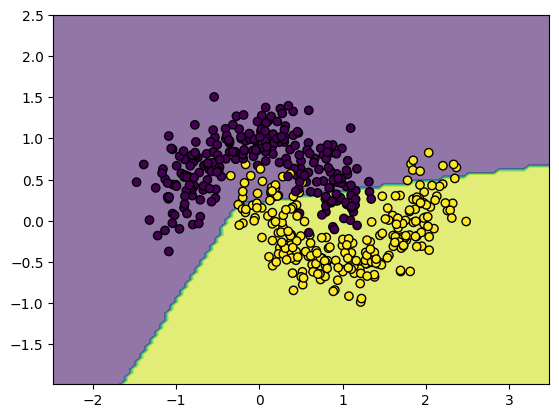

In [29]:
def plot_decision_boundary(X, y, params):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = predict(grid_points, params).reshape(xx.shape)
    plt.contourf(xx, yy, predictions, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k')
    plt.show()
plot_decision_boundary(X, y, params)

## Task-2 [15pts]

### XOR Function

This Task helps to explores how to train a Feedforward Neural Network (FFN) to approximate mathematical functions. 
#### Objective:
- Understand and generate data for different functions
- Design a simple NN using PyTorch
- rain model to accurately predict required outputs.
- Understand the use of Linear & Non-Linear Activation Functions.

#### XOR Truth Table

XOR (exclusive OR) function, a fundamental problem in neural networks that demonstrates the need for non-linear activation functions.

$
\begin{array}{|c|c|c|}
\hline
A & B & A \oplus B \\
\hline
F & F & F \\
F & T & T \\
T & F & T \\
T & T & F \\
\hline
\end{array}
$


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#### Step-1 Generate XOR data

In [31]:
def generate_xor_data():
    # ====================== YOUR CODE HERE ======================
    """
    Generate XOR training data

    Returns:
    X -- input data, shape (4, 2)
    y -- labels, shape (4, 1)
    """
    # XOR input and output values
    X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

    return X, y
    # ============================================================

#### Step-2: Implement XOR Model

In [32]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # ====================== YOUR CODE HERE ======================
        # Define the layers for XOR model
        # XOR is not linearly separable, so we need at least one hidden layer
        self.layer1 = nn.Linear(2, 4)  # Input layer -> Hidden layer (2 inputs, 4 hidden neurons)
        self.layer2 = nn.Linear(4, 1)  # Hidden layer -> Output layer (1 output)
        self.sigmoid = nn.Sigmoid()  # Activation function
        self.relu = nn.ReLU()  # ReLU for hidden layer
        # ============================================================

    def forward(self, x):
        # ====================== YOUR CODE HERE ======================
        # Forward pass through the network
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        # ============================================================
        return x

#### Step-3: Implement Training steps

In [33]:
num_epochs =  5000 # Number of Epochs
learning_rate = 0.1 # Learning rate

def train_model(model, X, y, epochs=num_epochs, lr=learning_rate):
    # ====================== YOUR CODE HERE ======================
    """
    Train the XOR model

    Arguments:
    model -- the neural network model
    X -- input data
    y -- labels
    epochs -- number of training epochs
    lr -- learning rate

    Returns:
    losses -- list of losses during training
    """
    # Define loss function and optimizer
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.SGD(model.parameters(), lr=lr)  # Stochastic Gradient Descent
    # ============================================================

    losses = []
    for epoch in range(epochs):
        # ====================== YOUR CODE HERE ======================
        # Forward pass
        outputs = model(X)
        loss = criterion(outputs, y)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update parameters

        # Store loss
        losses.append(loss.item())

        # Print progress
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
        # ============================================================

    return losses

#### Step-4: Define model to test predictions from model

In [34]:
def test_model(model, X):
    # ====================== YOUR CODE HERE ======================
    """
    Test the XOR model

    Arguments:
    model -- the trained neural network model
    X -- input data

    Returns:
    predictions -- model predictions rounded to 0 or 1
    """
    # Set model to evaluation mode
    model.eval()

    # Forward pass
    with torch.no_grad():  # No need to track gradients
        outputs = model(X)
        predictions = torch.round(outputs)  # Round to get binary predictions

    return predictions
    # ============================================================

In [35]:
X, y = generate_xor_data()
model = XORModel()
losses = train_model(model, X, y)

Epoch 0, Loss: 0.7225
Epoch 500, Loss: 0.1959
Epoch 1000, Loss: 0.0406
Epoch 1500, Loss: 0.0201
Epoch 2000, Loss: 0.0130
Epoch 2500, Loss: 0.0095
Epoch 3000, Loss: 0.0074
Epoch 3500, Loss: 0.0061
Epoch 4000, Loss: 0.0051
Epoch 4500, Loss: 0.0044


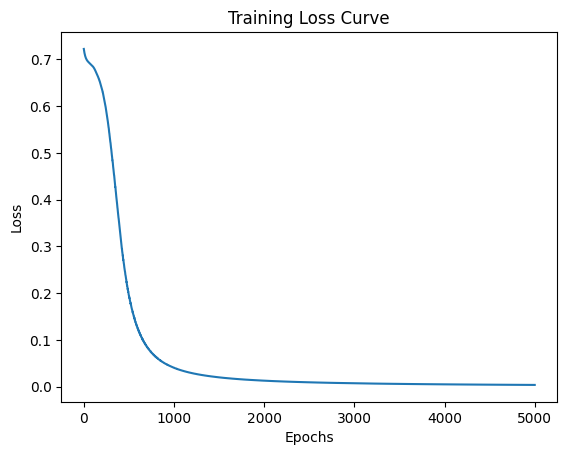

In [36]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

In [37]:
predictions = test_model(model, X)
print("Predictions:\n", predictions.numpy())

Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


## Task-3 [15pts]

### Weierstrass function

$f(x) = \sum_{n=0}^{\infty} a^n \cos(b^n \pi x)$ 
- $0<a<1$ 
- $b$ is a positive odd integer. 
- $ab>1+\frac{3}{2}.\pi$ 


#### Step-1

In [38]:
a = 0.1 # value of a
def weierstrass(x, a=a, b=7, n=20):
    # ====================== YOUR CODE HERE ======================
    """
    Compute the Weierstrass function

    Arguments:
    x -- input value or array
    a -- parameter (0 < a < 1)
    b -- parameter (positive odd integer)
    n -- number of terms to sum

    Returns:
    result -- computed value of the Weierstrass function
    """
    result = 0
    for i in range(n):
        result += a**i * np.cos(b**i * np.pi * x)
    return result
    # ============================================================

#### Step-2

In [39]:

# ====================== YOUR CODE HERE ======================
# Generate data for Weierstrass function
X = np.linspace(-2, 2, 1000).astype(np.float32)
y = np.array([weierstrass(x) for x in X]).astype(np.float32)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
# ============================================================

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)



#### Step-3

In [40]:
class FFN(nn.Module):
    def __init__(self):
        super(FFN, self).__init__()
        # ====================== YOUR CODE HERE ======================
        # Feed-forward neural network for approximating the Weierstrass function
        self.layer1 = nn.Linear(1, 64)   # Input layer -> Hidden layer 1
        self.layer2 = nn.Linear(64, 128) # Hidden layer 1 -> Hidden layer 2
        self.layer3 = nn.Linear(128, 64) # Hidden layer 2 -> Hidden layer 3
        self.layer4 = nn.Linear(64, 1)   # Hidden layer 3 -> Output layer

        # Activation functions
        self.relu = nn.ReLU()
        # ============================================================

    def forward(self, x):
        # ====================== YOUR CODE HERE ======================
        # Forward pass through the network
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        return x
        # ============================================================



#### Step-4

In [41]:
def train_ffn(model, X, y, epochs=5000, lr=0.001):
    # ====================== YOUR CODE HERE ======================
    """
    Train the feedforward neural network for Weierstrass function approximation

    Arguments:
    model -- the neural network model
    X -- input data
    y -- target values
    epochs -- number of training epochs
    lr -- learning rate

    Returns:
    losses -- list of losses during training
    """
    # Define loss function and optimizer
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Adam optimizer

    losses = []
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X)
        loss = criterion(outputs, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store loss
        losses.append(loss.item())

        # Print progress
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.6f}')
    # ============================================================
    return losses

In [42]:
model = FFN()
losses = train_ffn(model, X_tensor, y_tensor)

Epoch 0, Loss: 0.505321
Epoch 500, Loss: 0.003574
Epoch 1000, Loss: 0.002682
Epoch 1500, Loss: 0.003525
Epoch 2000, Loss: 0.002188
Epoch 2500, Loss: 0.002697
Epoch 3000, Loss: 0.002241
Epoch 3500, Loss: 0.002040
Epoch 4000, Loss: 0.001618
Epoch 4500, Loss: 0.001527


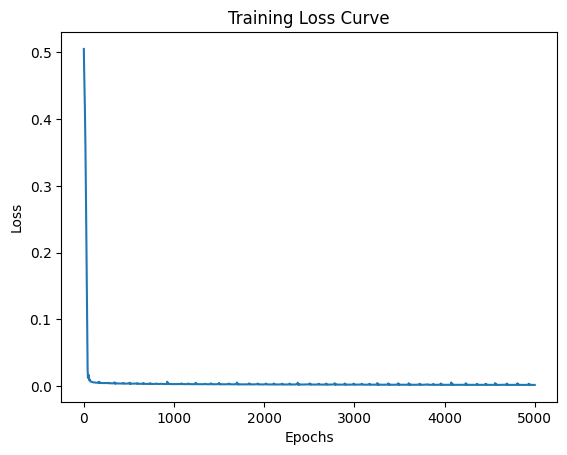

In [43]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#### Step-5

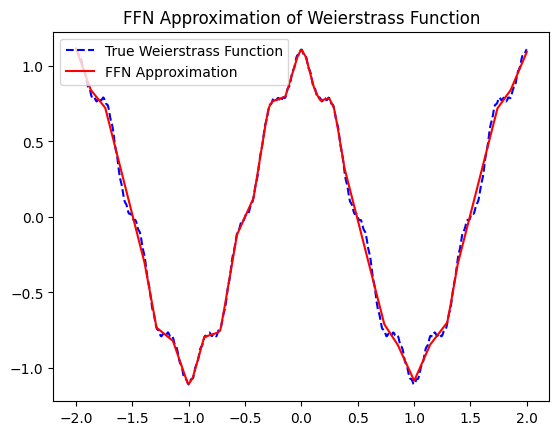

In [44]:

with torch.no_grad():
    # ====================== YOUR CODE HERE ======================
    # Generate predictions from the trained model
        y_pred = model(X_tensor).numpy()
    # ============================================================
plt.plot(X, y, label='True Weierstrass Function', linestyle='dashed', color='blue')
plt.plot(X, y_pred, label='FFN Approximation', color='red')
plt.legend()
plt.title('FFN Approximation of Weierstrass Function')
plt.show()

## Task-4 [50pts]

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

The goal of this task is to understand the impact of various hyperparameters on the performance of a deep learning model trained on the IRiS dataset. You will conduct experiments by modifying activation functions, learning rate, regularization techniques, and network depth. You will then analyze the results using plots.

**4.a)** Change the Activation Functions and Plot Accuracy Curves
- ReLU
- Sigmoid
- Tanh
- Leaky ReLU
- Swish
- ELU

**4.b)** Change the Learning Rate and Plot Accuracy Curves

**4.c)** Change Regularization and Compare Results 
- No regularization (baseline model)
- L1 Regularization
- L2 Regularization (Weight Decay)
- Dropout (50% probability for some layers)

**4.d)** Add Layers and Observe Accuracy Changes.
- Baseline model: 3 hidden layers (256 → 128 → 64)
- Deeper model: 5 hidden layers (512 → 256 → 128 → 64 → 32)
- Shallow model: 2 hidden layers (128 → 64)

In [46]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

In [47]:
activation_functions = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "LeakyReLU": nn.LeakyReLU(),
    "ELU": nn.ELU()
}

In [48]:
# Start Here
# Convert Iris dataset to PyTorch tensors
X_iris = torch.tensor(iris.data, dtype=torch.float32)
y_iris = torch.tensor(iris.target, dtype=torch.long)

# Normalize features
X_mean = X_iris.mean(0, keepdim=True)
X_std = X_iris.std(0, keepdim=True)
X_iris_normalized = (X_iris - X_mean) / X_std

# Split data into train and test sets
indices = torch.randperm(len(X_iris))
train_size = int(0.8 * len(X_iris))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X_iris_normalized[train_indices]
y_train = y_iris[train_indices]
X_test = X_iris_normalized[test_indices]
y_test = y_iris[test_indices]

# 4.a) Activation Functions Experiment
class IrisModelActivation(nn.Module):
    def __init__(self, activation_fn):
        super(IrisModelActivation, self).__init__()
        self.fc1 = nn.Linear(4, 256)  # 4 features in Iris dataset
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 3)   # 3 classes in Iris dataset

        self.activation = activation_fn

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return self.fc4(x)  # No activation on final layer (handled by loss function)

def train_iris_model(model, X_train, y_train, X_test, y_test, epochs=300, lr=0.01, weight_decay=0):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluation
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = (predicted == y_test).float().mean().item()
            test_accuracies.append(accuracy)

        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}')

    return train_losses, test_accuracies

# Function to run activation functions experiment
def run_activation_experiment():
    activation_results = {}

    for name, activation in activation_functions.items():
        print(f"\nTraining with {name} activation:")
        model = IrisModelActivation(activation)
        train_losses, test_accuracies = train_iris_model(model, X_train, y_train, X_test, y_test)
        activation_results[name] = {
            'losses': train_losses,
            'accuracies': test_accuracies
        }

    # Plot results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for name, result in activation_results.items():
        plt.plot(result['losses'], label=name)
    plt.title('Training Loss by Activation Function')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    for name, result in activation_results.items():
        plt.plot(result['accuracies'], label=name)
    plt.title('Test Accuracy by Activation Function')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return activation_results

# 4.b) Learning Rate Experiment
def run_learning_rate_experiment():
    learning_rates = [0.1, 0.01, 0.001, 0.0001]
    lr_results = {}

    for lr in learning_rates:
        print(f"\nTraining with learning rate {lr}:")
        model = IrisModelActivation(nn.ReLU())  # Using ReLU as the baseline activation
        train_losses, test_accuracies = train_iris_model(model, X_train, y_train, X_test, y_test, lr=lr)
        lr_results[f"LR={lr}"] = {
            'losses': train_losses,
            'accuracies': test_accuracies
        }

    # Plot results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for name, result in lr_results.items():
        plt.plot(result['losses'], label=name)
    plt.title('Training Loss by Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    for name, result in lr_results.items():
        plt.plot(result['accuracies'], label=name)
    plt.title('Test Accuracy by Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return lr_results

# 4.c) Regularization Experiment
class IrisModelDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(IrisModelDropout, self).__init__()
        self.fc1 = nn.Linear(4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 3)

        self.dropout = nn.Dropout(dropout_rate)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        return self.fc4(x)

def run_regularization_experiment():
    reg_results = {}

    # No regularization (baseline)
    print("\nTraining with no regularization:")
    model_baseline = IrisModelActivation(nn.ReLU())
    train_losses, test_accuracies = train_iris_model(model_baseline, X_train, y_train, X_test, y_test)
    reg_results["No Regularization"] = {
        'losses': train_losses,
        'accuracies': test_accuracies
    }

    # L2 Regularization (Weight Decay)
    print("\nTraining with L2 regularization:")
    model_l2 = IrisModelActivation(nn.ReLU())
    train_losses, test_accuracies = train_iris_model(model_l2, X_train, y_train, X_test, y_test, weight_decay=0.01)
    reg_results["L2 Regularization"] = {
        'losses': train_losses,
        'accuracies': test_accuracies
    }

    # Dropout
    print("\nTraining with Dropout:")
    model_dropout = IrisModelDropout()
    train_losses, test_accuracies = train_iris_model(model_dropout, X_train, y_train, X_test, y_test)
    reg_results["Dropout"] = {
        'losses': train_losses,
        'accuracies': test_accuracies
    }

    # Plot results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for name, result in reg_results.items():
        plt.plot(result['losses'], label=name)
    plt.title('Training Loss by Regularization Method')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    for name, result in reg_results.items():
        plt.plot(result['accuracies'], label=name)
    plt.title('Test Accuracy by Regularization Method')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return reg_results

# 4.d) Network Depth Experiment
class ShallowModel(nn.Module):
    def __init__(self):
        super(ShallowModel, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        return self.fc6(x)

def run_depth_experiment():
    depth_results = {}

    # Shallow model
    print("\nTraining shallow model:")
    model_shallow = ShallowModel()
    train_losses, test_accuracies = train_iris_model(model_shallow, X_train, y_train, X_test, y_test)
    depth_results["Shallow (2 layers)"] = {
        'losses': train_losses,
        'accuracies': test_accuracies
    }

    # Baseline model
    print("\nTraining baseline model:")
    model_baseline = BaselineModel()
    train_losses, test_accuracies = train_iris_model(model_baseline, X_train, y_train, X_test, y_test)
    depth_results["Baseline (3 layers)"] = {
        'losses': train_losses,
        'accuracies': test_accuracies
    }

    # Deep model
    print("\nTraining deep model:")
    model_deep = DeepModel()
    train_losses, test_accuracies = train_iris_model(model_deep, X_train, y_train, X_test, y_test)
    depth_results["Deep (5 layers)"] = {
        'losses': train_losses,
        'accuracies': test_accuracies
    }

    # Plot results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for name, result in depth_results.items():
        plt.plot(result['losses'], label=name)
    plt.title('Training Loss by Network Depth')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    for name, result in depth_results.items():
        plt.plot(result['accuracies'], label=name)
    plt.title('Test Accuracy by Network Depth')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return depth_results

# Main execution for Task 4
def run_all_experiments():
    print("Starting activation functions experiment...")
    activation_results = run_activation_experiment()

    print("\nStarting learning rate experiment...")
    lr_results = run_learning_rate_experiment()

    print("\nStarting regularization experiment...")
    reg_results = run_regularization_experiment()

    print("\nStarting network depth experiment...")
    depth_results = run_depth_experiment()

    return {
        'activation': activation_results,
        'learning_rate': lr_results,
        'regularization': reg_results,
        'depth': depth_results
    }


### Academic Integrity

Academic integrity is critical to the learning process. It is your responsibility as a student to complete your work in an honest fashion, upholding the expectations your individual instructors have for you in this regard. The ultimate goal is to ensure that you learn the content in your courses in accordance with UB’s academic integrity principles regardless of whether instruction is in-person or remote. Thank you for upholding your own personal integrity and ensuring UB’s tradition of academic excellence. For further details, please visit https://www.buffalo.edu/academic-integrity.html.